# Decision Tree Regressor for MPG Prediction

This notebook implements a **Decision Tree Regressor** algorithm using `scikit-learn` to predict the fuel efficiency (miles per gallon, MPG) of automobiles. The task is a **regression** problem, meaning we are predicting a continuous numerical value. 

In [1]:
# Import pandas for data manipulation and reading CSV files.
import pandas as pd
# Import NumPy for numerical operations.
import numpy as np
# Import pydotplus for visualizing the decision tree.
import pydotplus

# Import necessary modules from scikit-learn.
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz

# Import additional utilities for visualization.
from six import StringIO
from IPython.display import Image

## 1. Data Loading and Preparation

We'll load the dataset from a local `auto-mpg.csv` file. We will then clean the data by handling missing values (represented by '?') and separating it into features (X) and the target variable (y).

In [2]:
# Set the path to your CSV file.
# For this to work, 'auto-mpg.csv' must be in the same directory as this notebook.
path = "auto-mpg.csv"

try:
    mpg = pd.read_csv(path)
    print("Dataset loaded successfully!")
    display(mpg.head())

    # --- Data Cleaning and Preparation ---
    # Define the target variable (y) as the 'mpg' column.
    y = mpg['mpg']
    # Define the feature matrix (X) by dropping the 'mpg' column.
    X = mpg.drop('mpg', axis='columns')
    
    # Find all instances of '?' and replace them with 0.
    # A more advanced method could be to replace them with the column's mean or median.
    X = X.replace('?', 0)
    # The 'horsepower' column is likely of type 'object' due to the '?', so we convert it to numeric.
    X['horsepower'] = pd.to_numeric(X['horsepower'])

except FileNotFoundError:
    print(f"Error: The file '{path}' was not found.")
    print("Please make sure the CSV file is in the correct directory.")
    X, y = None, None

Dataset loaded successfully!


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


## 2. Train-Test Split

Next, we split our processed data into training and testing sets. The model will learn patterns from the training data, and we will evaluate its performance on the unseen test data.

In [3]:
if X is not None:
    # Split the dataset into a training set (70%) and a testing set (30%).
    # random_state=1 ensures the split is reproducible.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## 3. Building and Evaluating the Decision Tree Regressor

We will now build and train our regression tree. After training, we'll evaluate its performance using the **Root Mean Squared Error (RMSE)**. RMSE is a good metric because it's in the same units as our target variable (MPG), so it represents the typical prediction error of the model.

In [4]:
if X is not None:
    # Instantiate the DecisionTreeRegressor with specific hyperparameters to prevent overfitting.
    dt = DecisionTreeRegressor(max_depth=3, min_samples_leaf=0.13, random_state=3)

    # Fit (train) the regressor to the training data.
    dt.fit(X_train, y_train)

    # Use the trained model to make predictions on the test set.
    y_pred = dt.predict(X_test)

    # Compute the Mean Squared Error (MSE).
    mse_dt = mean_squared_error(y_test, y_pred)

    # Compute the Root Mean Squared Error (RMSE).
    rmse_dt = mse_dt ** (1/2)

    # Print the RMSE, formatted to two decimal places.
    print(f"Test set RMSE of the Decision Tree: {rmse_dt:.2f}")

Test set RMSE of the Decision Tree: 4.58


## 4. Visualizing the Regression Tree

Let's visualize the tree to see the rules it learned. Each node shows:
- The splitting rule (e.g., `displacement <= 199.5`).
- The Mean Squared Error (`mse`) for the samples in that node.
- The number of `samples` in that node.
- The average `value` (predicted MPG) for the samples in that node.

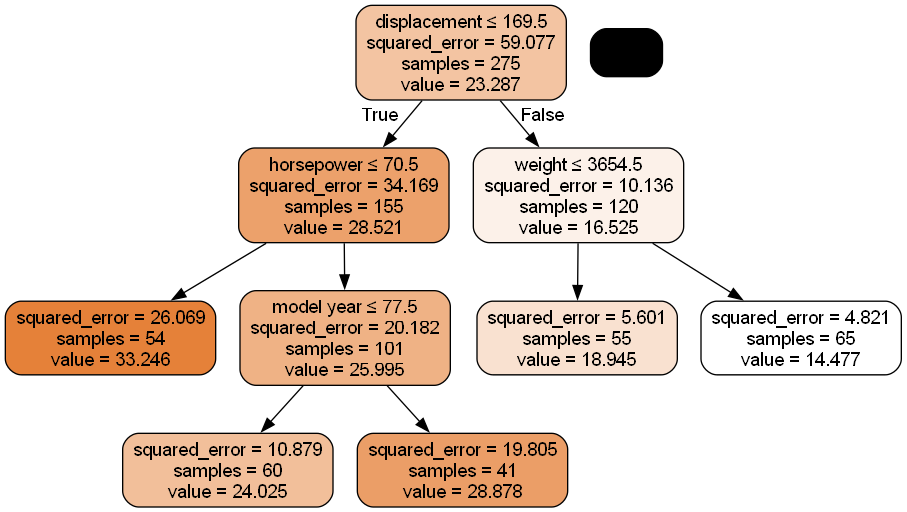

In [5]:
if X is not None:
    # Define the names of the feature columns for labeling the tree.
    feature_col = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
    
    # Create an in-memory text buffer.
    dot_data = StringIO()
    
    # Export the trained regressor into the DOT format.
    export_graphviz(dt, out_file=dot_data,
                    filled=True, rounded=True,
                    special_characters=True, feature_names=feature_col)
    
    # Create a graph object from the DOT data.
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    
    # Save the graph visualization as a PNG file.
    graph.write_png('mpg_decision_tree.png')
    
    # Display the generated image.
    display(Image(graph.create_png()))